# Project: Human or Horse Classification using CNN 

# Problem Statement

### Classification given image is horse or human(male/female)

In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

## Load Data

In [2]:
train_data_path = r"C:\Users\M.Muhtashim\OneDrive\Desktop\Final Project\Horse or Human prediction\horse-or-human\train"
validation_data_path = r"C:\Users\M.Muhtashim\OneDrive\Desktop\Final Project\Horse or Human prediction\horse-or-human\validation"

# Data Preprocessing

In [3]:
training_data_generator = ImageDataGenerator(rescale=1./255,
                                            rotation_range=40,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            shear_range=0.2,
                                            zoom_range=0.2,
                                             horizontal_flip=True,
                                            fill_mode="nearest",)

In [4]:
training_data = training_data_generator.flow_from_directory(train_data_path,
                                            target_size=(150, 150),
                                           batch_size=32,
                                           class_mode='binary')

Found 1027 images belonging to 2 classes.


In [5]:
training_data.class_indices

{'horses': 0, 'humans': 1}

In [6]:
validation_data_generator = ImageDataGenerator(rescale=1./255)

In [7]:
validation_data = validation_data_generator.flow_from_directory(validation_data_path,
                                            target_size=(150, 150),
                                           batch_size=32,
                                           class_mode='binary')

Found 256 images belonging to 2 classes.


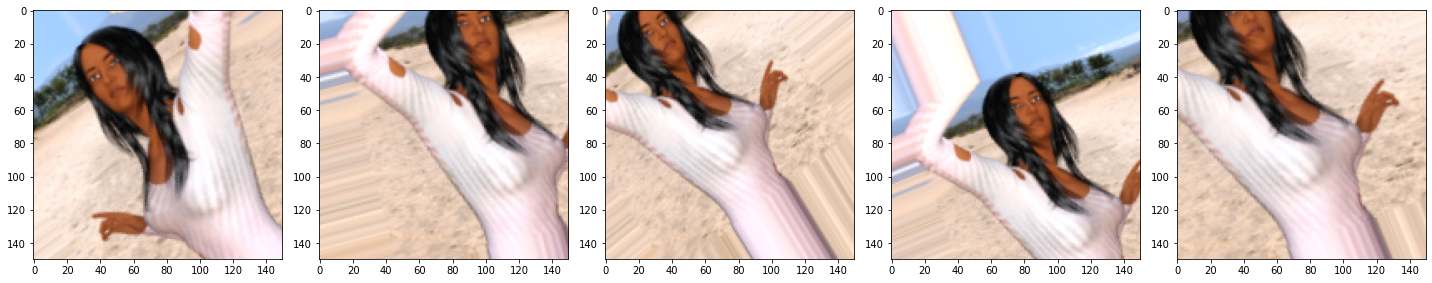

In [9]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
 
images = [training_data[1][0][0] for i in range(5)]
plotImages(images)

In [10]:
#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=7, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                      
                                    keras.layers.Conv2D(filters=64, kernel_size=5),
                              
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                      
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                  
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                                                          
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                            
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                                                      
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                 
                                    keras.layers.Dropout(0.5),                                      
                                    keras.layers.Dense(units=256, activation='relu'),  
                                                             
                                    keras.layers.Dropout(0.5),                                    
                                    keras.layers.Dense(units=2, activation='softmax') # output layer
])

In [11]:
# compile cnn model
from keras.optimizers import Adam
cnn_model.compile(optimizer = Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
from keras.callbacks import ModelCheckpoint
model_path = r'C:\Users\M.Muhtashim\OneDrive\Desktop\Final Project\Horse or Human prediction\hourse_or_human_predictor.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [13]:
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=3, 
                          verbose=1, 
                          validation_data= validation_data,
                          callbacks=callbacks_list)
 # due to low power of system we cant use more epochs thats why i can't get more accuracy

Epoch 1/3
33/33 [==============================] - 88s 3s/step - loss: 0.7102 - accuracy: 0.5000 - val_loss: 0.6887 - val_accuracy: 0.5000

Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to C:\Users\M.Muhtashim\OneDrive\Desktop\Final Project\Horse or Human prediction\hourse_or_human_predictor.h5
Epoch 2/3
33/33 [==============================] - 96s 3s/step - loss: 0.6854 - accuracy: 0.5663 - val_loss: 0.5363 - val_accuracy: 0.8047

Epoch 00002: val_accuracy improved from 0.50000 to 0.80469, saving model to C:\Users\M.Muhtashim\OneDrive\Desktop\Final Project\Horse or Human prediction\hourse_or_human_predictor.h5
Epoch 3/3
33/33 [==============================] - 79s 2s/step - loss: 0.6086 - accuracy: 0.6750 - val_loss: 0.8846 - val_accuracy: 0.5391

Epoch 00003: val_accuracy did not improve from 0.80469


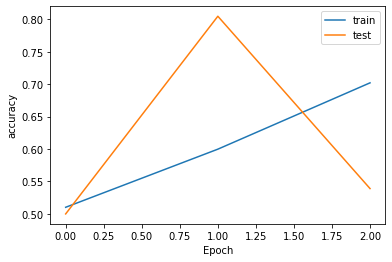

In [14]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

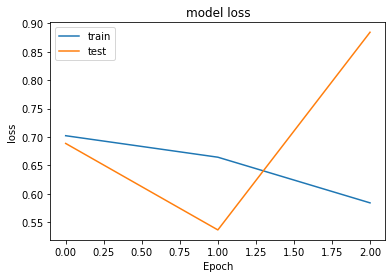

In [17]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.show()

# Predict Horse or Human

In [18]:
# Load Librarie
import numpy as np



# Import Model

In [19]:
model_path = r'C:\Users\M.Muhtashim\OneDrive\Desktop\Final Project\Horse or Human prediction\hourse_or_human_predictor.h5'

In [21]:
model = keras.models.load_model(model_path)

# Preprocessing

In [22]:
# Human Images Path
hu1 = r'C:\Users\M.Muhtashim\OneDrive\Desktop\Final Project\Horse or Human prediction\Test_Images\Human\handsome-confident-smiling-man-with-hands-crossed-chest_176420-18743.jpg'
hu2 = r'C:\Users\M.Muhtashim\OneDrive\Desktop\Final Project\Horse or Human prediction\Test_Images\Human\How-to-draw-a-human-1.jpg'
hu3 = r'C:\Users\M.Muhtashim\OneDrive\Desktop\Final Project\Horse or Human prediction\Test_Images\Human\istockphoto-1045886560-612x612.jpg'

# Horse Images Path

h1 = r'C:\Users\M.Muhtashim\OneDrive\Desktop\Final Project\Horse or Human prediction\Test_Images\Horse\db5cee101065dbc181dd100a8067a75d.jpg'
h2 = r'C:\Users\M.Muhtashim\OneDrive\Desktop\Final Project\Horse or Human prediction\Test_Images\Horse\https___cdn.cnn.com_cnnnext_dam_assets_181122153222-ellert-icelandic-horse-04.jpg'
h3 = r'C:\Users\M.Muhtashim\OneDrive\Desktop\Final Project\Horse or Human prediction\Test_Images\Horse\https___cdn.cnn.com_cnnnext_dam_assets_190131143958-horse-barber-healing.jpg'




In [26]:
from keras.preprocessing import image

def pred_human_or_horse(model, horse_or_human):
    test_images = image.load_img(horse_or_human, target_size = (150,150))
    test_images = image.img_to_array(test_images)/255
    test_images = np.expand_dims(test_images, axis = 0)

    result = model.predict(test_images).round(3)

    pred = np.argmax(result)
    print(result, "------->",pred)

    if pred == 0:
        print('pridicted >>> Horse')
    else:
        print('predicted >>> Human')
    

In [30]:
pred_human_or_horse(model, hu1)

[[0.301 0.699]] -------> 1
predicted >>> Human


In [31]:
pred_human_or_horse(model, h1)

[[0.518 0.482]] -------> 0
pridicted >>> Horse


In [32]:
pred_human_or_horse(model, hu2)

[[0.279 0.721]] -------> 1
predicted >>> Human


# Predicted Output

In [33]:
for horse_or_human in [hu1,hu2,hu3,h1,h2,h3]:
    pred_human_or_horse(model, horse_or_human)

[[0.301 0.699]] -------> 1
predicted >>> Human
[[0.279 0.721]] -------> 1
predicted >>> Human
[[0.338 0.662]] -------> 1
predicted >>> Human
[[0.518 0.482]] -------> 0
pridicted >>> Horse
[[0.598 0.402]] -------> 0
pridicted >>> Horse
[[0.667 0.333]] -------> 0
pridicted >>> Horse


In [ ]:
# Our Model Work very Well so now we can deploy our model